- Naive bayes is not good with continuous values.
    - Naive Bayes is particularly sensitive to the distribution of continuous values within features. 
    - It assumes that the continuous values associated with each class are normally (Gaussian) distributed. 
    - If the continuous values do not follow a normal distribution or if there are significant deviations from normality, Gaussian Naive Bayes might not perform well.
    - Ex of continuos values: age, height, temperature,etc. Generally those values which are `not` categorial are known as continuous.
- To apply Naive bayes features must be `independant` of each other.
    - Because in naive bayes the assumption is that features are independant of each other. That's why it is called naive.
    - We can use `correlation matrix` to find out which feature are `dependant` of one another and we will try to avoid taking those as our input feature to model.



### Problem statement
Classification: Naïve Bayes

Dataset: NaiveBayes.csv

Use probabilistic approach to implement Classifier model. Evaluate
the performance of the model.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../all_datasets/Decision Tree & Naive Bayes Classification/NaiveBayes.csv")
data

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<AxesSubplot:>

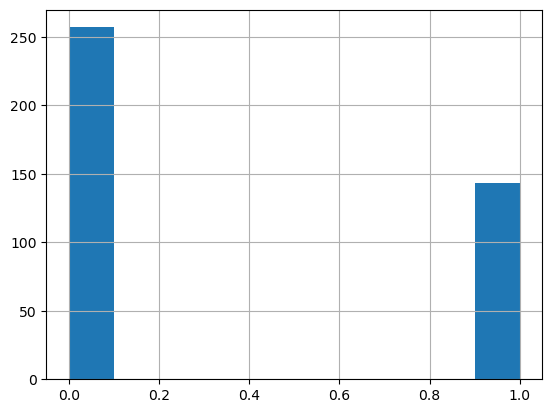

In [4]:
# checking the distribution of output variable
data['Purchased'].hist()

### Finding the dependant and independant features using correlation matrix
- As naive bayes works better with independant features we will try to find dependant feature and eliminate them.
- can directly use data.corr() method to check the correlation but to better visualize it we are using sns heatmap.

<AxesSubplot:>

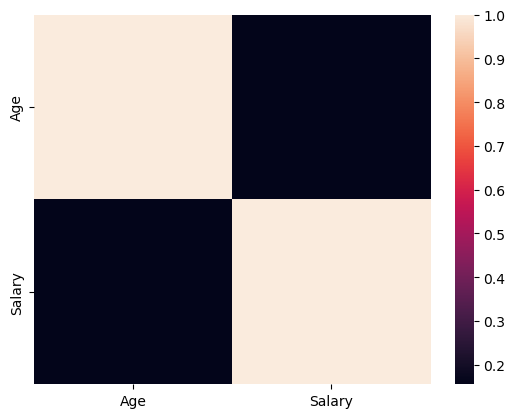

In [9]:
corr_data = data.iloc[:, : -1].corr(method="pearson")
sns.heatmap(corr_data)

Darker area shows more covariance means it is independant to each other.
If any features are dependant then don't consider them for model fitting.

In [10]:
print(corr_data.corr())

        Age  Salary
Age     1.0    -1.0
Salary -1.0     1.0


### Visualizing the distribution of each feature

<AxesSubplot:xlabel='Salary', ylabel='Count'>

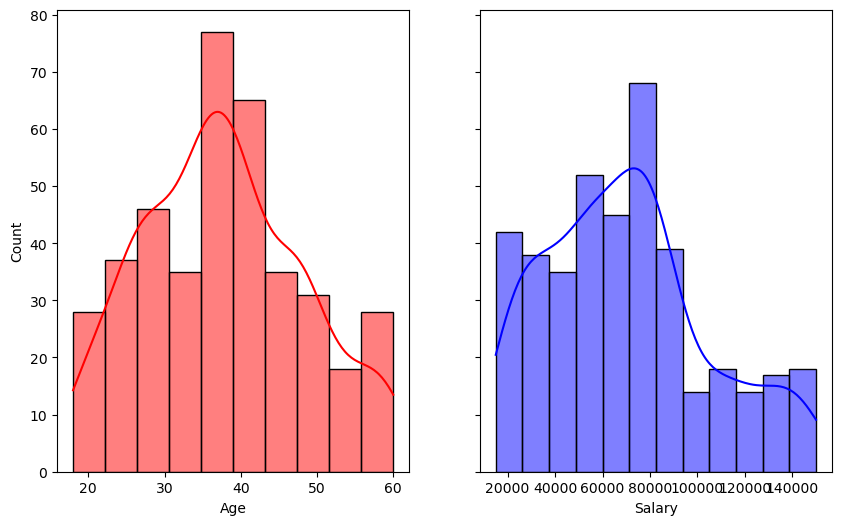

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10,6), sharey=True) 
# This below figure has 1 row, 2 column 
sns.histplot(data, ax=axes[0], x="Age",kde=True, color="r")
sns.histplot(data, ax=axes[1], x="Salary",kde=True, color="b")